# Assignment 4: Mouse vs Human Cell types

This assignment will test your ability to pull data from the Allen Cell Types dataset and perform some preliminary plotting with the data.

This assignment is worth 5 points (5% of your grade). 

**PLEASE DO NOT CHANGE THE NAME OF THIS FILE.**

**PLEASE DO NOT COPY & PASTE OR DELETE CELLS INCLUDED IN THE ASSIGNMENT.**


## How to complete assignments

Whenever you see:

```
# YOUR CODE HERE
raise NotImplementedError()
```

You need to **replace (by which we mean _delete_) these lines of code with code that answers the questions** and meets the specified criteria. Make sure you remove the 'raise' line when you do this (or your notebook will raise an error, regardless of any other code, and thus fail the grading tests).

You should write the answer to the questions in those cells (the ones with `# YOUR CODE HERE`), but you can also add extra cells to explore / investigate things if you need / want to. 

Any cell with `assert` statements in it is a test cell. You should not try to change or delete these cells. Note that there might be more than one assert that tests a particular question. 

If a test does fail, reading the error that is printed out should let you know which test failed, which may be useful for fixing it.

Note that some cells, including the test cells, may be read only, which means they won't let you edit them. If you cannot edit a cell - that is normal, and you shouldn't need to edit that cell.


## Tips & Tricks

The following are a couple tips & tricks that may help you if you get stuck on anything.

#### Printing Variables
You can (and should) print and check variables as you go. This allows you to check what values they hold, and fix things if anything unexpected happens.

#### Restarting the Kernel
- If you run cells out of order, you can end up overwriting things in your namespace. 
- If things seem to go weird, a good first step is to restart the kernel, which you can do from the kernel menu above.
- Even if everything seems to be working, it's a nice check to 'Restart & Run All', to make sure everything runs properly in order.

## Part I: Create dataframes from the cell types data

### Q1
In the cells below, create two Pandas dataframes that contain the cell types metadata for mouse and human cells. Name your dataframes `mouse_df` and `human_df` respectively. 

In [194]:
### BEGIN SOLUTION

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
import pandas as pd

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

human_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN]))
mouse_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.MOUSE]))

### END SOLUTION

In [195]:
assert isinstance(mouse_df,pd.DataFrame)
assert isinstance(human_df,pd.DataFrame)

In [196]:
# Hidden tests for Q1
### BEGIN HIDDEN TESTS
assert len(mouse_df) == 1920
assert len(human_df) == 411
### BEGIN HIDDEN TESTS

### Q2

Just like we did in our in-class notebook, reassign the indexes of these dataframes to be the 'id' column.

In [197]:
### BEGIN SOLUTION
human_df = human_df.set_index('id')
mouse_df = mouse_df.set_index('id')
### END SOLUTION

In [198]:
### BEGIN HIDDEN TESTS
assert mouse_df.index[0] == 565871768
assert human_df.index[0] == 525011903
### BEGIN HIDDEN TESTS

### Q3

Since this is our first time looking at the mouse data, let's get a few metrics from our data set, and compare the data in this dataset to the human data.

1. Assign the **length** of the mouse data (in other words, the number of cells) to `mouse_length`.
2. Assign the **columns** of the mouse dataframe to a list called `mouse_columns`.
3. Check if the columns of the mouse dataframe and human dataframe are the same names, and assign the outcome of this operation to `columns_bool`.

In [199]:
### BEGIN SOLUTION
mouse_length = len(mouse_df)
mouse_columns = list(mouse_df.columns)
columns_bool = mouse_columns == list(human_df.columns)
### END SOLUTION

In [200]:
assert isinstance(mouse_length,int)
assert isinstance(mouse_columns,list)
assert isinstance(columns_bool,bool)

In [201]:
### BEGIN HIDDEN TESTS
assert mouse_length == 1920
assert mouse_columns[0] == 'reporter_status'
assert columns_bool == True
### END HIDDEN TESTS

### Q4

Let's look a little more closely at some of the data in `mouse_df`. There is a column called 'transgenic_line' which tells us which transgenic mouse this data was taken from. There is also a column 'normalized_depth' which tells us how deep in the brain the cell recorded from was. All of these recordings in mice are from different parts of cortex, so, we can use these two columns to get an idea of whether these transgenic lines are specifically marking different layers of the cortex.

1. Generate a list of all of the unique values in 'transgenic_line' and assign this to `transgenic_lines`.
2. Write a loop that creates a dataframe for each transgenic line, and then computes the mean and standard deviation of the 'normalized depth' column. Save these means and standard deviations for each transgenic line in variables `all_means` and `all_STDs`. Hint: `mean()` and `std()` are methods of Pandas dataframes. See documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean) and [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html).

In [202]:
### BEGIN SOLUTION
transgenic_lines = mouse_df['transgenic_line'].unique()
all_means = []
all_STDs = []

for line in transgenic_lines:
    this_df = mouse_df[mouse_df['transgenic_line']==line]
    all_means.append(this_df['normalized_depth'].mean()) 
    all_STDs.append(this_df['normalized_depth'].std())
    
### END SOLUTION

In [203]:
assert isinstance(transgenic_lines,object)
assert isinstance(all_means,list)
assert isinstance(all_STDs,list)

In [204]:
### BEGIN HIDDEN TESTS
assert (len(transgenic_lines),len(all_means),len(all_STDs)) == (37,37,37)
### END HIDDEN TESTS

### Q5

Now we have three objects: transgenic_lines, all_means, and all_STDs. For the purposes of getting a sense of the differences between the depth of cells in our transgenic lines, we can create a bar plot using `plt.bar()`.

In the space below, create a bar plot where the x axis is the transgenic lines, and y axis is normalized depth. In other words, each bar should represent a different transgenic line. You can add error bars with the `yerr` argument. [See the pyplot.bar documentation for full details.](https://matplotlib.org/2.1.0/api/_as_gen/matplotlib.pyplot.bar.html)

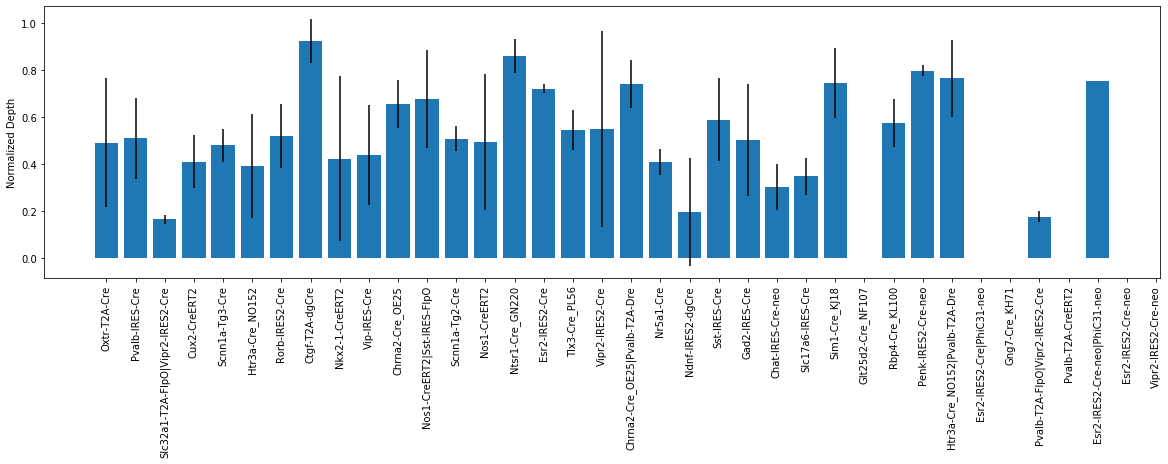

In [205]:
fig,ax = plt.subplots(figsize=(20,5))

### BEGIN SOLUTION
plt.bar(transgenic_lines,all_means,yerr=all_STDs)
plt.xticks(rotation=90)
plt.ylabel('Normalized Depth')
plt.show()
### END SOLUTION

### Q6
As we mentioned in class, bar plots (even with error bars) aren't the *best* at showing us the variability in our data. Creating boxplots with `plt.boxplot()` would take quite a few lines of code, but thankfully, Pandas also has a built-in boxplot method. [Check out the dataframe boxplot documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html), and create your figure below. Plot the figure **on the axis created by `plt.subplots()` on the first line.** Hint: specify "ax=" in your call to boxplot.

Let's also clean up this figure. Label the y axis 'Normalized Depth'. Rotate the xticks so that we can read them [see documentation here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html).

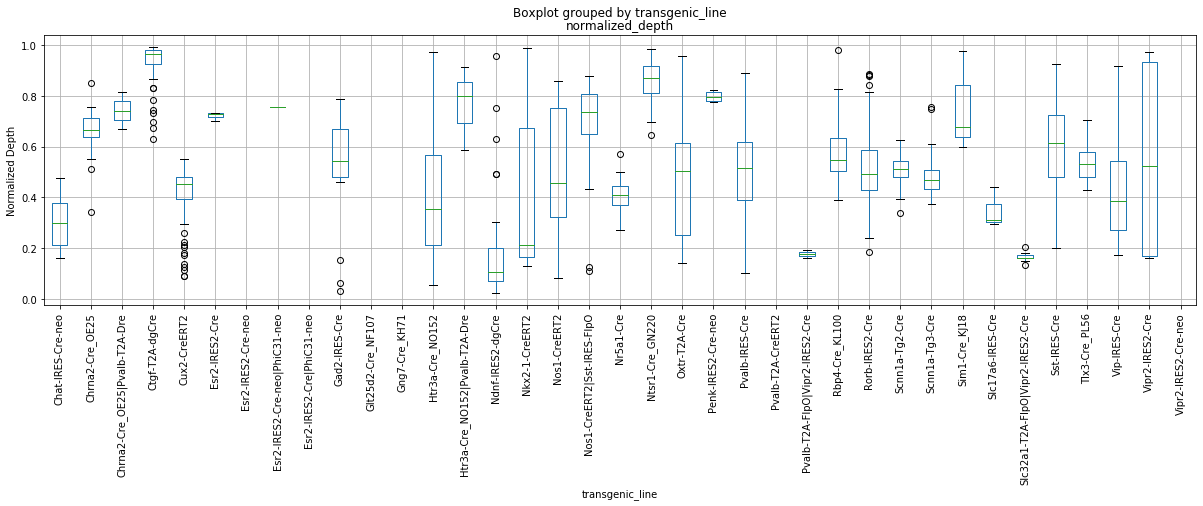

In [206]:
fig,ax = plt.subplots(figsize=(20,5))

### BEGIN SOLUTION
ax = mouse_df.boxplot(column='normalized_depth',by='transgenic_line',ax=ax)
plt.xticks(rotation=90)
plt.ylabel('Normalized Depth')
plt.show()
### END SOLUTION

In [207]:
### BEGIN HIDDEN TESTS
assert ax.get_ylabel() == 'Normalized Depth'
### END HIDDEN TESTS

## Q7
Anyway, we've digressed from our main goal here: comparing mouse and human cells. First, we need to get the electrophysiology features and create a dataframe that contains both the meta data and ephys features.
1. Join both the human and mouse dataframes with the a dataframe containing all of the electrophysiology features for these cells, and assign your dataframes to `human_ephys_df` and `mouse_ephys_df`.
2. Assign the column names of the ephys features dataframe to `ephys_columns`. Make sure this variable is a list. We'll use this later.

In [208]:
### BEGIN SOLUTION
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
ephys_columns = list(ephys_features.columns)
human_ephys_df = human_df.join(ephys_features)
mouse_ephys_df = mouse_df.join(ephys_features)
### END SOLUTION

In [209]:
assert isinstance(mouse_ephys_df,pd.DataFrame)
assert isinstance(human_ephys_df,pd.DataFrame)

In [210]:
### BEGIN HIDDEN TESTS
assert len(mouse_ephys_df) == 1920
assert len(human_ephys_df) == 411
assert 'avg_isi' in list(mouse_ephys_df.columns)
### END HIDDEN TESTS

## Q8
Let's compare data for 'vrest' (resting membrane potential) for all human and all mouse cells.
1. Assign the columns for 'vrest' to `mouse_vrest` and `human_vrest`, respectively.
2. Create a list of your two mouse_vrest and human_vrest lists, and call it `data`.
3. Use `plt.boxplot()` to create a boxplot of your data.
4. Label your bars 'Mouse' and 'Human'.
5. Label your yaxis 'Voltage (V)'.
6. Give your graph a reasonable title.

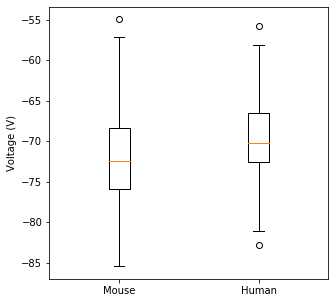

In [211]:
fig,ax = plt.subplots(figsize=(5,5))

### BEGIN SOLUTION
mouse_vrest = mouse_ephys_df['vrest']
human_vrest = human_ephys_df['vrest']
data = [mouse_vrest,human_vrest]

plt.boxplot(data)
plt.ylabel('Voltage (V)')
ax.set_xticklabels(['Mouse','Human'])
plt.show()
### END SOLUTION

In [212]:
assert isinstance(mouse_vrest,pd.Series)
assert isinstance(human_vrest,pd.Series)
assert isinstance(data,list)
assert ax.get_ylabel() == 'Voltage (V)'

Looks like resting membrane potential is *pretty* similar all of these mouse and human cells -- that's good, considering we use mice cells as a model for human cells!

## Q9
Rather than go through inspect each of these metrics separately, let's compute a difference between the average of all of the columns. First, we need to curate a list of metrics to look at. The `ephys_columns` list that you made is a great start, but it contains a few 'id' variables that aren't electrophysiology metrics; they're just the id.

Create a loop that goes through the ephys_columns list and removes any item from the list that contains 'id'. Hint: lists have a `remove()` method. The name of ephys_columns will remain the same.

In [213]:
### BEGIN SOLUTION
for metric in ephys_columns:
    if 'id' in metric:
        ephys_columns.remove(metric)
### END SOLUTION

In [214]:
assert len(ephys_columns) == 52

## Q10

Lastly, let's compute and plot a normalized difference for each of these metrics. For this, you'll need to import the `stats` module from the package `scipy`. I've already included this in the cell below.

1. Create a loop that goes through ephys_columns and computes a mean for each of the metrics in our curated list, for both `mouse_ephys_df` and `human_ephys_df`.
2. Within the body of the loop, append the difference between these means (human - mouse) to a list called `differences`.
3. Outside the body of the loop, use `stats.zscore(differences)` to create a z-scored list of differences assigned to `diff_zscore`.
4. Visualize your data with a simple bar plot, where diff_zscore is y axis, and each bar is a different electrophysiology metric. Don't worry about providing labels for this plot, but you might want to rotate the xticks again so you can read the names!

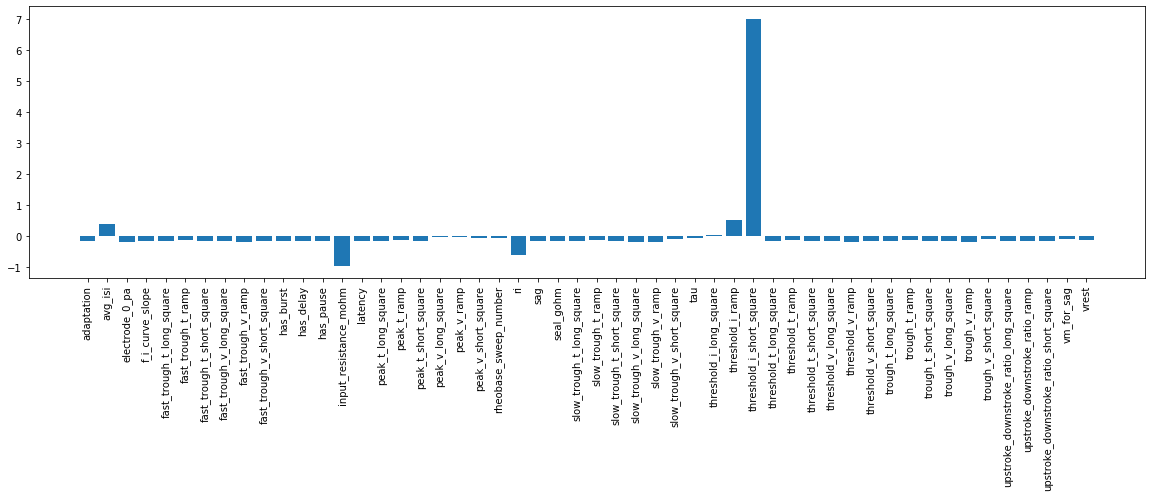

In [215]:
from scipy import stats

# Set up the figure
fig,ax = plt.subplots(figsize=(20,5))

### BEGIN SOLUTION
differences = []

for metric in ephys_columns:
    human_mean = human_ephys_df[metric].mean()
    mouse_mean = mouse_ephys_df[metric].mean()
    differences.append(human_mean - mouse_mean)
    
diff_zscore = stats.zscore(differences)
plt.bar(ephys_columns,diff_zscore)
plt.xticks(rotation=90)
plt.show()
### END SOLUTION

In [216]:
assert isinstance(differences,list)
assert isinstance(diff_zscore,np.ndarray)

### BEGIN HIDDEN TESTS
assert max(diff_zscore) == 7.024097418976765
## END HIDDEN TESTS

Now we're seeing a few interesting differences between mouse and human cells! We'll talk about how to test whether or not these are significant in an upcoming lecture.